In [1]:
%run StatTest2_WithSimulation_Setup.ipynb

{0: ['ME', 'IL', 'PA', 'GA', 'OK', 'DE', 'WA', 'CT', 'OH', 'VA', 'NE', 'MT', 'IN', 'CA', 'HI', 'ND', 'MD', 'SC', 'RI', 'AK', 'KY', 'WI', 'LA', 'MN', 'MS', 'WV', 'FL'], 1: ['SD', 'IL', 'PA', 'NH', 'NM', 'NV', 'OK', 'UT', 'CT', 'OH', 'VA', 'OR', 'CO', 'IN', 'HI', 'AL', 'RI', 'AK', 'LA', 'MN', 'IA', 'AR', 'WV'], 2: ['MI', 'ME', 'WY', 'DC', 'TX', 'AZ', 'NC', 'WA', 'OR', 'CO', 'MT', 'ND', 'TN', 'SC', 'AL', 'NY', 'KY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 3: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'GA', 'AZ', 'NM', 'NC', 'NV', 'DE', 'UT', 'NE', 'CA', 'MD', 'TN', 'NY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO']}
{0: ['MI', 'SD', 'WY', 'NH', 'DC', 'TX', 'AZ', 'NM', 'NC', 'NV', 'UT', 'OR', 'CO', 'TN', 'AL', 'NY', 'NJ', 'KS', 'ID', 'IA', 'AR', 'MO'], 1: ['MI', 'ME', 'WY', 'DC', 'TX', 'GA', 'AZ', 'NC', 'DE', 'WA', 'NE', 'MT', 'CA', 'ND', 'MD', 'TN', 'SC', 'NY', 'KY', 'NJ', 'KS', 'WI', 'ID', 'MS', 'FL', 'MO'], 2: ['SD', 'IL', 'PA', 'NH', 'GA', 'NM', 'NV', 'OK', 'DE', 'UT', 'CT', 'OH', 'VA', 'NE', 'IN'

In [2]:
data2014 = pd.read_csv("Our_Dataset/2014dataset.csv")
data2015 = pd.read_csv("Our_Dataset/2015dataset.csv")
data2016 = pd.read_csv("Our_Dataset/2016dataset.csv")
data2017 = pd.read_csv("Our_Dataset/2017dataset.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,52,323,649,882,932,1092,1202) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,57,204,341,376,377,396,430,431,928,944,1006,1013,1151,1160,1169,1179,1411) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,17,163,355,406,702,835,847,1083,1156,1183,1185,1200) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Create the labels.
# By index:
# label 2 is transfers
# label 3 is premiums
# label 4 is costs
# label 5 is member months
# label 6 is reinsurance (individual group only)

ind_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                  "HHS RISK ADJUSTMENT TRANSFER AMOUNT (INDIVIDUAL MARKET, INCLUDING CATASTROPHIC)",
                  "1.1Directpremiumwritten2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "2.16Totalincurredclaims2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "7.4Membermonths2HealthInsuranceINDIVIDUALTotalasof3/31/15",
                  "STATE", "REINSURANCE PAYMENT AMOUNT (OR NOT ELIGIBLE)"] # no more reinsurance as of 2017
ind_labels_15 = [label.replace('15', '16') for label in ind_labels_14]
ind_labels_16 = [label.replace('15', '17') for label in ind_labels_14]
ind_labels_17 = [label.replace('15', '18') for label in ind_labels_14][:-1]

sg_labels_14 = ["HIOS ID", "HIOS INPUTTED INSURANCE COMPANY NAME",
                 "HHS RISK ADJUSTMENT TRANSFERS AMOUNT (SMALL GROUP MARKET)",
                  "1.1Directpremiumwritten7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "2.16Totalincurredclaims7HealthInsuranceSMALLGROUPTotalasof3/31/15",
                  "7.4Membermonths7HealthInsuranceSMALLGROUPTotalasof3/31/15", "STATE"]
sg_labels_15 = [label.replace('15', '16') for label in sg_labels_14]
sg_labels_16 = [label.replace('15', '17') for label in sg_labels_14]
sg_labels_17 = [label.replace('15', '18') for label in sg_labels_14]

In [4]:
# Filter the data to include only the fields we want

ind_data_14 = data2014[ind_labels_14].dropna()
ind_data_15 = data2015[ind_labels_15].dropna()
ind_data_16 = data2016[ind_labels_16].dropna()
ind_data_17 = data2017[ind_labels_17].dropna()
sg_data_14 = data2014[sg_labels_14].dropna()
sg_data_15 = data2015[sg_labels_15].dropna()
sg_data_16 = data2016[sg_labels_16].dropna()
sg_data_17 = data2017[sg_labels_17].dropna()

In [5]:
# Drop companies with <2000 MM
ind_data_14 = ind_data_14.where(ind_data_14[ind_labels_14[5]] > 2000).dropna()
ind_data_15 = ind_data_15.where(ind_data_15[ind_labels_15[5]] > 2000).dropna()
ind_data_16 = ind_data_16.where(ind_data_16[ind_labels_16[5]] > 2000).dropna()
ind_data_17 = ind_data_17.where(ind_data_17[ind_labels_17[5]] > 2000).dropna()
sg_data_14 = sg_data_14.where(sg_data_14[sg_labels_14[5]] > 2000).dropna()
sg_data_15 = sg_data_15.where(sg_data_15[sg_labels_15[5]] > 2000).dropna()
sg_data_16 = sg_data_16.where(sg_data_16[sg_labels_16[5]] > 2000).dropna()
sg_data_17 = sg_data_17.where(sg_data_17[sg_labels_17[5]] > 2000).dropna()

In [6]:
# Calculate transfers, premiums, costs, and reinsurance (if individual group) per member month
def calculate_pmm(df, df_labels, group):
    df["MM"] = df[df_labels[5]]
    df["Transfers"] = df[df_labels[2]]
    df["TotalCosts"] = abs(df[df_labels[4]])
    df["Enrollees"] = df["MM"] / 12
    df["TransfersPerEnrollee"] = df["Transfers"] / df["Enrollees"]
    df["TransfersPerSqrtEnrollee"] = df["Transfers"] / np.sqrt(df["Enrollees"])
    df["LogEnrollees"] = np.log(df["Enrollees"])
    df["LogTransfers"] = np.log(df["Transfers"]**2 + 1)
    df["TransfersPMM"] = df[df_labels[2]] / df[df_labels[5]]
    df["PremiumsPMM"] = abs(df[df_labels[3]] / df[df_labels[5]])
    df["CostsPMM"] = abs(df[df_labels[4]] / df[df_labels[5]])
    if group == "i":
        df["ReinsurancePMM"] = df[df_labels[7]] / df[df_labels[5]]
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"] + df["ReinsurancePMM"]
        #df["PremMinusCostsPlusReinsurancePMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["ReinsurancePMM"]
    elif group == "sg":
        df["ProfitsPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["PremMinusCostsPMM"] = df["PremiumsPMM"] - df["CostsPMM"]
    df["PremMinusCostsPlusTransfersPMM"] = df["PremiumsPMM"] - df["CostsPMM"] + df["TransfersPMM"]
    df["SicknessPMM"] = df["CostsPMM"] - df["PremiumsPMM"]
    average_sickness = np.mean(df["SicknessPMM"])
    df["ExcessSicknessPMM"] = df["SicknessPMM"] - average_sickness
    return df

ind_data_14 = calculate_pmm(ind_data_14, ind_labels_14, "i")
ind_data_15 = calculate_pmm(ind_data_15, ind_labels_15, "i")
ind_data_16 = calculate_pmm(ind_data_16, ind_labels_16, "i")
ind_data_17 = calculate_pmm(ind_data_17, ind_labels_17, "sg")
sg_data_14 = calculate_pmm(sg_data_14, sg_labels_14, "sg")
sg_data_15 = calculate_pmm(sg_data_15, sg_labels_15, "sg")
sg_data_16 = calculate_pmm(sg_data_16, sg_labels_16, "sg")
sg_data_17 = calculate_pmm(sg_data_17, sg_labels_17, "sg")

In [7]:
# Combine the dataframes by left merging

ind_data = ind_data_14.merge(ind_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(ind_data_16, on='HIOS ID', how='outer').merge(ind_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [8]:
# Do the same thing for small group

sg_data = sg_data_14.merge(sg_data_15, on='HIOS ID', how='outer', suffixes=('_14', '_15'))\
.merge(sg_data_16, on='HIOS ID', how='outer').merge(sg_data_17, on='HIOS ID', how='outer', suffixes=('_16', '_17'))

In [9]:
states = ["CA"]
dfs = [sg_data_14, sg_data_15, sg_data_16, sg_data_17]

In [10]:
dfs_new = normalize_empirical_data_to_avg_2017_dollars(dfs, states)

Cbar is 4398.953
CA 14 Ratio is 1.154
CA 15 Ratio is 1.117
CA 16 Ratio is 1.051
CA 17 Ratio is 1.015
Empirical Transfers Sum = 2043400167.669


In [11]:
for df_temp in dfs_new:
    df_temp["TransfersNormalizedPerSqrtEnrollee"] = df_temp["TransfersNormalized"] / np.sqrt(df_temp["Enrollees"])

In [12]:
#dfs_new[3][["TransfersPerSqrtEnrollee", "TransfersNormalizedPerSqrtEnrollee"]]

In [13]:
df2 = create_df2(states, dfs_new, "TransfersNormalizedPerSqrtEnrollee")


In [14]:
k = len(df2)
v = np.linspace(0, max(abs(df2)), 10000)
v = v[1:len(v)]

ratios = [ratio_list(df2, vi) for vi in v]
#print(ratios)
begin_p = 5/k
end_p = 1-begin_p
start_index = 0
end_index = 0
for index, ratio2 in enumerate(ratios):
    if ratio2 >= begin_p:
        start_index = index
        break
    
for index, ratio2 in enumerate(ratios):
    if ratio2 > end_p:
        end_index = index
        break

if end_index == 0:
    end_index = len(v) - 1
    
v = v[start_index:end_index]

ratios2 = ratios[start_index:end_index]
multiplier = [np.sqrt(2)/vi for vi in v]
#plt.plot(v, ratios2)
#plt.plot(v, multiplier)

In [15]:
y = [multiplier[i] * special.erfinv(ratio2) for i, ratio2 in enumerate(ratios2)]
#plt.plot(v, y)
#plt.title("1/beta vs. v")
beta = [1/yi for yi in y]
#plt.plot(v, beta)
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
#plt.title("beta vs. v")

In [16]:
# Finding the minimum beta
# Whenever we reject a beta, we reject all betas greater than that,
# so keep pushing beta smaller until we reach max_difference == test_statistic
# Run test for larger data sizes (combining states, years)

In [17]:
max_beta=max(beta)
max_beta = int(max_beta/100)*100

beta = 122700.000


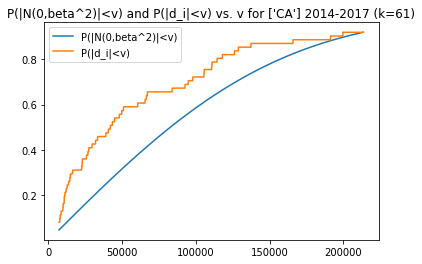

In [18]:
theoretical = [special.erf(vi/(max_beta*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v)")
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (states, len(df2)))
#plt.axvline(x=64432.69, color='r', linestyle='--', label="Point of max difference")
plt.legend()
print("beta = %.3f" % (max_beta))

In [19]:
beta_theoretical, Mb_index = run_test_against_theoretical(df2, max_beta, ratios2, False)

k = 61
test_stat at this k = 0.15385

At the point of maximum difference with beta = 122700:
P(|d_i|<v) = 0.5902
P(|N(0,max_beta^2)|<v) = 0.3225
Difference = 0.2676




At the point of maximum difference with beta = 112700:
P(|d_i|<v) = 0.5902
P(|N(0,max_beta^2)|<v) = 0.3493
Difference = 0.2408




At the point of maximum difference with beta = 102700:
P(|d_i|<v) = 0.5902
P(|N(0,max_beta^2)|<v) = 0.3808
Difference = 0.2094




At the point of maximum difference with beta = 92700:
P(|d_i|<v) = 0.4590
P(|N(0,max_beta^2)|<v) = 0.2821
Difference = 0.1770




At the point of maximum difference with beta = 92700:
P(|d_i|<v) = 0.4590
P(|N(0,max_beta^2)|<v) = 0.2821
Difference = 0.1770




At the point of maximum difference with beta = 92600:
P(|d_i|<v) = 0.4590
P(|N(0,max_beta^2)|<v) = 0.2823
Difference = 0.1767




At the point of maximum difference with beta = 92500:
P(|d_i|<v) = 0.4590
P(|N(0,max_beta^2)|<v) = 0.2826
Difference = 0.1764




At the point of maximum difference with beta = 92


At the point of maximum difference with beta = 86200:
P(|d_i|<v) = 0.4098
P(|N(0,max_beta^2)|<v) = 0.2508
Difference = 0.1590




At the point of maximum difference with beta = 86100:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1527
Difference = 0.1588




At the point of maximum difference with beta = 86000:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1529
Difference = 0.1586




At the point of maximum difference with beta = 85900:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1531
Difference = 0.1584




At the point of maximum difference with beta = 85800:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1532
Difference = 0.1582




At the point of maximum difference with beta = 85700:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1534
Difference = 0.1581




At the point of maximum difference with beta = 85600:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1536
Difference = 0.1579




At the point of maximum difference with beta = 85500:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta

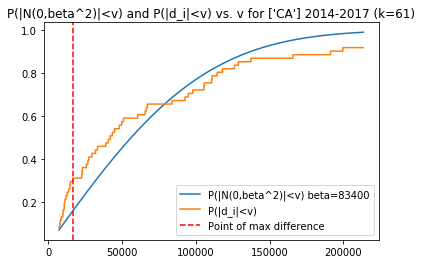

In [20]:
beta_theoretical = beta_theoretical+100

theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) beta=%d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v)")
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s 2014-2017 (k=%d)" % (states, len(df2)))
plt.axvline(x=v[Mb_index], color='r', linestyle='--', label="Point of max difference")
plt.legend()
#plt.xlim(0, 50000)
#print("beta = %.3f" % (max_beta))

In [21]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)

Theoretical Test Results
Beta (=std): 83400
Number of T/sqrt(n) above 2 stds: 7
Proportion of T/sqrt(n) above 2 stds: 0.115
P value = 0.006278


In [22]:
ratios_c, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical - 10000)
ratios_c2, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical)
ratios_c3, _ = create_simulation_adjust_for_imbalances(states, dfs_new, beta_theoretical + 10000)

Sum sqrt(a) = 14920.576
Sum sqrt(a) = 14920.576
Sum sqrt(a) = 14920.576


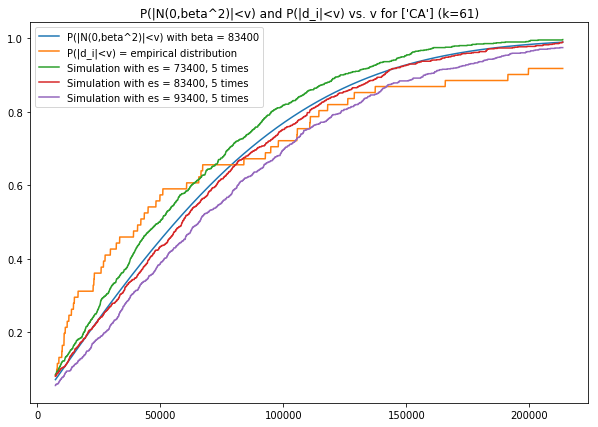

In [23]:
theoretical = [special.erf(vi/(beta_theoretical*np.sqrt(2))) for vi in v]

plt.figure(figsize=(10, 7))
plt.plot(v, theoretical, label="P(|N(0,beta^2)|<v) with beta = %d" % (beta_theoretical))
plt.plot(v, ratios2, label="P(|d_i|<v) = empirical distribution")
plt.plot(v, ratios_c, label="Simulation with es = %d, 5 times" % (beta_theoretical - 10000))
plt.plot(v, ratios_c2, label="Simulation with es = %d, 5 times" % (beta_theoretical))
plt.plot(v, ratios_c3, label="Simulation with es = %d, 5 times" % (beta_theoretical + 10000))
plt.title("P(|N(0,beta^2)|<v) and P(|d_i|<v) vs. v for %s (k=%d)" % (states, len(df2)))
plt.legend()

In [24]:
beta_sims = list()

for i in range(5):
    beta_sim, _= run_test_against_simulation(states, dfs_new, beta_theoretical, ratios2, False)
    beta_sims.append(beta_sim)

k = 61
test_stat at this k = 0.15385

At the point of maximum difference with beta = 87400:
P(|d_i|<v) = 0.4590
P(|N(0,max_beta^2)|<v) = 0.2732
Difference = 0.1858




At the point of maximum difference with beta = 87300:
P(|d_i|<v) = 0.4590
P(|N(0,max_beta^2)|<v) = 0.2820
Difference = 0.1770




At the point of maximum difference with beta = 87200:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1388
Difference = 0.1727




At the point of maximum difference with beta = 87100:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1486
Difference = 0.1628




At the point of maximum difference with beta = 87000:
P(|d_i|<v) = 0.4590
P(|N(0,max_beta^2)|<v) = 0.2754
Difference = 0.1836




At the point of maximum difference with beta = 86900:
P(|d_i|<v) = 0.4098
P(|N(0,max_beta^2)|<v) = 0.2197
Difference = 0.1902




At the point of maximum difference with beta = 86800:
P(|d_i|<v) = 0.5902
P(|N(0,max_beta^2)|<v) = 0.4164
Difference = 0.1738




At the point of maximum difference with beta = 86700


At the point of maximum difference with beta = 84800:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1486
Difference = 0.1628




At the point of maximum difference with beta = 84700:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1432
Difference = 0.1683




At the point of maximum difference with beta = 84600:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1377
Difference = 0.1738




At the point of maximum difference with beta = 84500:
P(|d_i|<v) = 0.4262
P(|N(0,max_beta^2)|<v) = 0.2393
Difference = 0.1869




At the point of maximum difference with beta = 84400:
P(|d_i|<v) = 0.4098
P(|N(0,max_beta^2)|<v) = 0.2546
Difference = 0.1552




At the point of maximum difference with beta = 84300:
P(|d_i|<v) = 0.2951
P(|N(0,max_beta^2)|<v) = 0.1344
Difference = 0.1607




At the point of maximum difference with beta = 84200:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1421
Difference = 0.1694




At the point of maximum difference with beta = 84100:
P(|d_i|<v) = 0.4098
P(|N(0,max_beta

In [25]:
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)

Simulation without Adjustment Test Results
Beta (=std): 85960
Number of T/sqrt(n) above 2 stds: 7
Proportion of T/sqrt(n) above 2 stds: 0.115
P value = 0.006278
Beta (=std): 85960
Number of T/sqrt(n) above 3 stds: 4
Proportion of T/sqrt(n) above 3 stds: 0.066
P value = 0.000001


In [26]:
beta_sim_adjs = list()

for i in range(5):
    beta_sim_adj, _= run_test_against_simulation_adjust_for_imbalances(states, dfs_new,
                                                                   beta_theoretical, ratios2, False)
    beta_sim_adjs.append(beta_sim_adj)

k = 61
test_stat at this k = 0.15385
Sum sqrt(a) = 14920.576

At the point of maximum difference with beta = 87400:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1366
Difference = 0.1749



Sum sqrt(a) = 14920.576

At the point of maximum difference with beta = 87300:
P(|d_i|<v) = 0.3115
P(|N(0,max_beta^2)|<v) = 0.1486
Difference = 0.1628



Sum sqrt(a) = 14920.576

At the point of maximum difference with beta = 87200:
P(|d_i|<v) = 0.4098
P(|N(0,max_beta^2)|<v) = 0.2361
Difference = 0.1738



Sum sqrt(a) = 14920.576

At the point of maximum difference with beta = 87100:
P(|d_i|<v) = 0.4098
P(|N(0,max_beta^2)|<v) = 0.2525
Difference = 0.1574



Sum sqrt(a) = 14920.576

At the point of maximum difference with beta = 87000:
P(|d_i|<v) = 0.4426
P(|N(0,max_beta^2)|<v) = 0.2656
Difference = 0.1770



Sum sqrt(a) = 14920.576

At the point of maximum difference with beta = 86900:
P(|d_i|<v) = 0.4590
P(|N(0,max_beta^2)|<v) = 0.3137
Difference = 0.1454 NOT > test_stat
E(|X|) = 1034535574.267
k 

In [27]:
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Simulation WITH Adjustment Test Results
Beta (=std): 86660
Number of T/sqrt(n) above 2 stds: 7
Proportion of T/sqrt(n) above 2 stds: 0.115
P value = 0.006278
Beta (=std): 86660
Number of T/sqrt(n) above 3 stds: 4
Proportion of T/sqrt(n) above 3 stds: 0.066
P value = 0.000001


In [28]:
print("Theoretical Test Results")
run_binom_stat_test2(beta_theoretical, df2.values)
run_binom_stat_test3(beta_theoretical, df2.values)
print("\n")
print("Simulation without Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sims), df2.values)
run_binom_stat_test3(np.mean(beta_sims), df2.values)
print("\n")
print("Simulation WITH Adjustment Test Results")
run_binom_stat_test2(np.mean(beta_sim_adjs), df2.values)
run_binom_stat_test3(np.mean(beta_sim_adjs), df2.values)

Theoretical Test Results
Beta (=std): 83400
Number of T/sqrt(n) above 2 stds: 7
Proportion of T/sqrt(n) above 2 stds: 0.115
P value = 0.006278
Beta (=std): 83400
Number of T/sqrt(n) above 3 stds: 4
Proportion of T/sqrt(n) above 3 stds: 0.066
P value = 0.000001


Simulation without Adjustment Test Results
Beta (=std): 85960
Number of T/sqrt(n) above 2 stds: 7
Proportion of T/sqrt(n) above 2 stds: 0.115
P value = 0.006278
Beta (=std): 85960
Number of T/sqrt(n) above 3 stds: 4
Proportion of T/sqrt(n) above 3 stds: 0.066
P value = 0.000001


Simulation WITH Adjustment Test Results
Beta (=std): 86660
Number of T/sqrt(n) above 2 stds: 7
Proportion of T/sqrt(n) above 2 stds: 0.115
P value = 0.006278
Beta (=std): 86660
Number of T/sqrt(n) above 3 stds: 4
Proportion of T/sqrt(n) above 3 stds: 0.066
P value = 0.000001
